__Importing necessary libraries__

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import norm

__Loading the dataset__

In [5]:
data = pd.read_csv("/Users/swastika/Downloads/movie_ratings.csv")

__Displaying first 5 rows of dataset__

In [6]:
data.head()

,Unnamed: 0,movie,year,imdb,metascore,votes
0,0,Gladiator,2000,8.5,67.0,1187559
1,1,Memento,2000,8.5,80.0,1014199
2,2,Snatch,2000,8.3,NaN,707162
3,3,Requiem for a Dream,2000,8.3,68.0,688394
4,4,X-Men,2000,7.4,64.0,526411


__Displaying last 5 rows of dataset__

In [8]:
data.tail()

,Unnamed: 0,movie,year,imdb,metascore,votes
1795,1795,Transformers: The Last Knight,2017,5.2,NaN,113918
1796,1796,Mindhunter,2017,8.5,NaN,111213
1797,1797,The Lego Batman Movie,2017,7.3,75.0,111193
1798,1798,The Handmaid's Tale,2017,8.6,NaN,106329
1799,1799,The Disaster Artist,2017,7.4,76.0,106238


__Displaying all the columns of dataset__

In [7]:
data.columns

Index(['Unnamed: 0', 'movie', 'year', 'imdb', 'metascore', 'votes'], dtype='object')

__Describing the dataset__

In [9]:
data.describe()

,Unnamed: 0,year,imdb,metascore,votes
count,1800.00000,1800.000000,1800.000000,950.000000,1.800000e+03
mean,899.50000,2008.495556,7.239444,74.280000,3.176363e+05
std,519.75956,5.183780,0.818280,9.065475,2.151333e+05
min,0.00000,2000.000000,4.100000,61.000000,9.342800e+04
25%,449.75000,2004.000000,6.700000,67.000000,1.842225e+05
50%,899.50000,2008.500000,7.300000,73.000000,2.467390e+05
75%,1349.25000,2013.000000,7.800000,81.000000,3.825830e+05
max,1799.00000,2017.000000,9.900000,100.000000,2.020298e+06


__Displaying null values in each column__

In [10]:
data.isnull().sum()

Unnamed: 0      0
movie           0
year            0
imdb            0
metascore     850
votes           0
dtype: int64

__Displaying the number of columns and rows of dataset__

In [11]:
data.shape

(1800, 6)

__Dropping all the null values of dataset__

In [12]:
df = data.dropna()

__Displaying the modified number of columns and rows of dataset__

In [13]:
df.shape

(950, 6)

__Displaying value counts for each imdb rating__

In [15]:
df.imdb.value_counts()

7.7    86
7.6    80
7.8    68
7.3    64
7.2    64
8.1    60
7.9    60
8.0    58
7.4    50
7.5    50
7.1    48
7.0    46
6.9    28
6.6    26
8.2    24
6.8    22
6.7    20
8.3    16
8.4    14
6.4    12
8.5    12
6.5     8
6.2     8
6.3     6
8.6     6
8.8     4
8.9     2
8.7     2
6.1     2
9.0     2
5.8     2
Name: imdb, dtype: int64

__Calculating the population parameters: population mean, standard deviation and variance__

In [16]:
pop_mean = df["imdb"].mean()
pop_std = df["imdb"].std()
pop_var = df["imdb"].var()
print("The population mean is: " ,pop_mean)
print("The population standard deviation is: " ,pop_std)
print("The population variance is: " ,pop_var)

The population mean is:  7.5136842105263195
The population standard deviation is:  0.5270772595926756
The population variance is:  0.27781043757972473


__Selecting random samples from the dataset__     
- Here we have used Simple Random Sampling method of Random or Probability Sampling
- We used .random() library of python

In [17]:
#sampling
n = int(0.05*950)
rating_list=list(range(0,950))
sample_list = random.sample(rating_list, n)
print(sample_list)

[561, 646, 10, 820, 256, 122, 467, 656, 752, 590, 636, 830, 855, 791, 59, 548, 875, 745, 609, 461, 38, 29, 892, 359, 859, 822, 410, 501, 713, 593, 425, 369, 649, 227, 398, 240, 162, 672, 935, 333, 310, 313, 742, 643, 251, 28, 718]


__Collection of data values present at randomly generated indexes by python__
- Here we appended those values in sample list; imdb_sample 
- We also calculated its length to determine sample size

In [43]:
imdb_sample=[]
for i in sample_list:
    imdb_sample.append(df["imdb"].iloc[i])
print(imdb_sample)
n = len(sample_list)
print(n)

[7.5, 7.8, 7.2, 7.6, 7.0, 8.1, 7.7, 7.1, 7.3, 7.4, 7.4, 7.9, 7.5, 7.8, 7.6, 7.6, 7.4, 7.7, 7.1, 6.7, 7.3, 7.6, 8.1, 7.7, 7.6, 8.2, 7.1, 7.8, 8.1, 8.1, 6.7, 7.7, 7.7, 7.8, 7.7, 7.5, 7.7, 7.2, 8.4, 7.3, 8.4, 7.5, 6.4, 8.1, 6.7, 7.8, 7.3]
47


- __Sample Data is almost normally distributed, so we can proceed further__

(array([ 1.,  3.,  0.,  4.,  6., 12., 12.,  1.,  6.,  2.]),
 array([6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. , 8.2, 8.4]),
 <BarContainer object of 10 artists>)

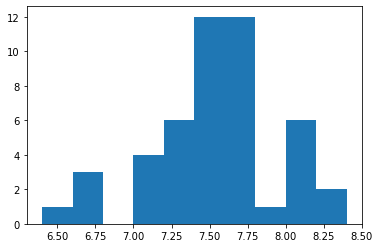

In [120]:
plt.hist(imdb_sample)

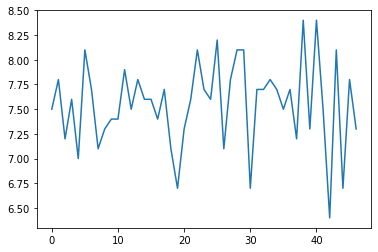

In [121]:
plt.plot(imdb_sample)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f954b835880>,
 'caps': [<matplotlib.lines.Line2D at 0x7f954b835e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f954b835580>],
 'medians': [<matplotlib.lines.Line2D at 0x7f954b845400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f954b8456d0>],
 'means': []}

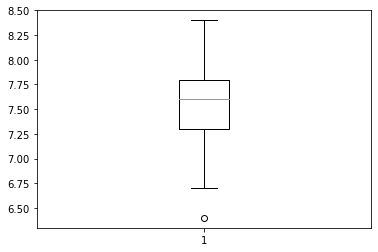

In [122]:
plt.boxplot(imdb_sample)

__Displaying value counts for each rating of sample__

In [19]:
sample_list1 = pd.DataFrame(imdb_sample)
sample_list1.value_counts()

7.7    7
7.6    5
7.8    5
8.1    5
7.3    4
7.5    4
6.7    3
7.1    3
7.4    3
7.2    2
8.4    2
6.4    1
7.0    1
7.9    1
8.2    1
dtype: int64

__Calculating the sample parameters: sample mean, standard deviation and variance__

In [20]:
samp_mean = np.mean(imdb_sample)
samp_std = np.std(imdb_sample)
samp_var = np.var(imdb_sample)
print("The sample mean is: " ,samp_mean)
print("The sample standard deviation is: " ,samp_std)
print("The sample variance is: " ,samp_var)

The sample mean is:  7.551063829787235
The sample standard deviation is:  0.43655924529113166
The sample variance is:  0.19058397464916246


# z test

- __First step is to calculate the z-statistic__

In [112]:
#z-statistic
finite_corr = math.pow(((950-47)/(950-1)),0.5)
zs = (samp_mean - pop_mean)*(math.pow(n,0.5))/((pop_std)*(finite_corr))
print(zs)

0.4987686486653422


- __Estimating 90% confidence interval for sample mean__

In [75]:
#90% confidence interval a = 0.10
#z(a/2) = z(0.5-0.05) = z(0.45)
za = 1.645
margin_of_error = za*((pop_std)/(math.pow(n,0.5))*finite_corr)
conf_range_90 = [samp_mean - margin_of_error,samp_mean + margin_of_error]
print(conf_range_90)

[7.427695972567184, 7.674431687007285]


- __Estimating required sample size for 90% confidence interval of sample mean__

In [84]:
#estimating sample size using population mean
n1 = math.pow(((1.645*pop_std)/(samp_mean-pop_mean)),2)
print(n1)

538.035109127575


- __Estimating 95% confidence interval for sample mean__

In [114]:
#95% confidence interval a = 0.05
#z(a/2) = z(0.5-0.025) = z(0.475)
za = 1.96
margin_of_error = za*((pop_std)/(math.pow(n,0.5))*finite_corr)
conf_range_95 = [samp_mean - margin_of_error,samp_mean + margin_of_error]
print(conf_range_95)

[7.404030056728397, 7.6979699432716036]


- __Estimating required sample size for 95% confidence interval of sample mean__

In [115]:
#estimating sample size using population mean
n1 = math.pow(((1.96*pop_std)/(samp_mean-pop_mean)),2)
print(n1)

762.7639669421538


- __Estimating 99% confidence interval for sample mean__

In [116]:
#99% confidence interval a = 0.01
#z(a/2) = z(0.5-0.005) = z(0.495)
za = 2.575
margin_of_error = za*((pop_std)/(math.pow(n,0.5))*finite_corr)
conf_range_99 = [samp_mean - margin_of_error,samp_mean + margin_of_error]
print(conf_range_99)

[7.357914487793684, 7.744085512206317]


- __Estimating required sample size for 99% confidence interval of sample mean__

In [82]:
#estimating sample size using population mean
n1 = math.pow(((2.575*pop_std)/(samp_mean-pop_mean)),2)
print(n1)

1318.3577555488312


# t test

- __First step is to calculate the t-statistic__

In [50]:
#t-statistic
ts = ((samp_mean - pop_mean)*(math.pow(n,0.5)))/(samp_std)
print(ts)

0.5870033941817827


- __Estimating 90% confidence interval for sample mean__

In [58]:
#90% confidence interval
dof = n - 1 
#t(a/2) = t(0.05, 46)
ta = 1.679            #from t-table
margin_of_error = (ta*(samp_std))/math.pow(n,0.5)
conf_range_90 = [samp_mean - margin_of_error,samp_mean + margin_of_error]
print(conf_range_90)

[7.444147274685271, 7.657980384889198]


- __Estimating 95% confidence interval for sample mean__

In [59]:
#95% confidence interval
dof = n - 1 
#t(a/2) = t(0.025, 46)
ta = 2.013            #from t-table
margin_of_error = (ta*(samp_std))/math.pow(n,0.5)
conf_range_95 = [samp_mean - margin_of_error,samp_mean + margin_of_error]
print(conf_range_95)

[7.4228785853439625, 7.679249074230507]


- __Estimating 99% confidence interval for sample mean__

In [60]:
#99% confidence interval
dof = n - 1 
#t(a/2) = t(0.005, 46)
ta = 2.687            #from t-table
margin_of_error = (ta*(samp_std))/math.pow(n,0.5)
conf_range_99 = [samp_mean - margin_of_error,samp_mean + margin_of_error]
print(conf_range_99)

[7.379959134397731, 7.7221685251767385]


# p test

- __Calculating sample and population proportions__

In [2]:
#suppose we are taking for a rating of 7.7  
pop_prop = 86/950
samp_prop = 7/47
print(pop_prop)
print(samp_prop)

0.09052631578947369
0.14893617021276595


- __First step is to calculate the p-statistic__

In [87]:
#p-statistic 
ps = (samp_prop - pop_prop)/math.sqrt((samp_prop)*(1-samp_prop)/n)
print(ps)

1.124744543832107


- __Estimating 90% confidence interval for sample proportion__

In [88]:
#90% confidence interval a = 0.10
#z(a/2) = z(0.5-0.05) = z(0.45)
za = 1.645
margin_of_error = za*(math.pow(((samp_prop)*(1-samp_prop)/n),0.5))
conf_range_90 = [samp_prop - margin_of_error,samp_prop + margin_of_error]
print(conf_range_90)

[0.06350858485285114, 0.23436375557268074]


- __Estimating required sample size for 90% confidence interval of sample proportion__

In [96]:
#estimating sample size using population proportion
n1 = ((1.645**2)*(pop_prop)*(1-pop_prop))/((samp_prop-pop_prop)**2)
print(n1)

65.30170791359295


- __Estimating 95% confidence interval for sample proportion__

In [89]:
#95% confidence interval a = 0.05
#z(a/2) = z(0.5-0.025) = z(0.475)
za = 1.96
margin_of_error = za*(math.pow(((samp_prop)*(1-samp_prop)/n),0.5))
conf_range_95 = [samp_prop - margin_of_error,samp_prop + margin_of_error]
print(conf_range_95)

[0.047150111060527036, 0.2507222293650049]


- __Estimating required sample size for 95% confidence interval of sample proportion__

In [97]:
#estimating sample size using population proportion
n1 = ((1.96**2)*(pop_prop)*(1-pop_prop))/((samp_prop-pop_prop)**2)
print(n1)

92.7053671421582


- __Estimating 99% confidence interval for sample proportion__

In [90]:
#99% confidence interval a = 0.01
#z(a/2) = z(0.5-0.005) = z(0.495)
za = 2.575
margin_of_error = za*(math.pow(((samp_prop)*(1-samp_prop)/n),0.5))
conf_range_99 = [samp_prop - margin_of_error,samp_prop + margin_of_error]
print(conf_range_99)

[0.015212138418370436, 0.28266020200716147]


- __Estimating required sample size for 99% confidence interval of sample proportion__

In [98]:
#estimating sample size using population proportion
n1 = ((2.575**2)*(pop_prop)*(1-pop_prop))/((samp_prop-pop_prop)**2)
print(n1)

160.0100283754094


# chi-square test

- __First step is to calculate the chi-statistic__

In [91]:
#chi-statistic
cs = ((n-1)*math.pow(samp_std,2))/(math.pow(pop_std,2))
print(cs)

31.556995879053684


- __Estimating 90% confidence interval for population standard deviation__

In [92]:
#90% confidence interval(a=0.10)
#ca1 = chi-square(a/2) = chi-square(0.05)
#ca2 = chi-square(1-a/2) = chi-square(0.95)
ca1 = 62.830        #from chi-square table
ca2 = 31.539       #from chi-square table
conf_range_90 = [((n-1)*math.pow(samp_std,2))/ca1 , ((n-1)*math.pow(samp_std,2))/ca2]
print(conf_range_90)

[0.13953307072833795, 0.2779689537988355]


- __Estimating 95% confidence interval for population standard deviation__

In [93]:
#95% confidence interval(a=0.05)
#ca1 = chi-square(a/2) = chi-square(0.025)
#ca2 = chi-square(1-a/2) = chi-square(0.975)
ca1 = 66.617        #from chi-square table
ca2 = 29.160      #from chi-square table
conf_range_95 = [((n-1)*math.pow(samp_std,2))/ca1 , ((n-1)*math.pow(samp_std,2))/ca2]
print(conf_range_95)

[0.13160098524192734, 0.30064687358921377]


- __Estimating 99% confidence interval for population standard deviation__

In [94]:
#99% confidence interval(a=0.01)
#ca1 = chi-square(a/2) = chi-square(0.005)
#ca2 = chi-square(1-a/2) = chi-square(0.995)
ca1 = 74.437        #from chi-square table
ca2 = 25.041      #from chi-square table
conf_range_99 = [((n-1)*math.pow(samp_std,2))/ca1 , ((n-1)*math.pow(samp_std,2))/ca2]
print(conf_range_99)

[0.11777560667223927, 0.3501003487824557]


# HTAB Analysis

__Hypothesize__
- Step 1. Establish a null and alternative hypothesis.

__Test__
- Step 2. Determine the appropriate statistical test.
- Step 3. Set the value of alpha, the Type I error rate.
- Step 4. Establish the decision rule.
- Step 5. Gather sample data.
- Step 6. Analyze the data.

__Action__
- Step 7. Reach a statistical conclusion.

__Business Implication__
- Step 8. Make a business decision.


### __HYPOTHESIZE__:


- __Step 1__    
    Null Hypothesis - lets take a hypothesis that population mean is 8                        
    h0 = 8

### __TEST__:
  

- __Step 2__      
    Determining the appropriate statistical test and sampling distribution.
    Because the population mean (7.5136) and standard deviation is known (0.5270) and we are using the sample mean
    as the statistic, the z test is the appropriate test statistic.

- __Step 3__  
    Specifying the Type I error rate, or alpha, which is .05 in this case.
    alpha = 0.05

- __Step 4__  
    Stating the decision rule. Because the test is two tailed and alpha is .05, there is a/2 or .025 area in each 
    of the tails of the distribution. Thus, the rejection region is in the two ends of the distribution with 2.5% 
    of the area in each. There is a .4750 area between the mean and each of the critical values that separate the 
    tails of the distribution (the rejection region) from the non-rejection region. By using this .4750 area and 
    Z-Table, the critical z value can be obtained. z(a/2) = 1.96
    The decision rule is that if the data gathered produce a z value greater than 1.96 or less than -1.96, the test
    statistic is in one of the rejection regions and the decision is to reject the null hypothesis. If the observed
    z value calculated from the data is between -1.96 and +1.96, the decision is to not reject the null hypothesis
    because the observed z value is in the non-rejection region.

- __Step 5__  
    It is to gather the data. Suppose the 47 samples produce a sample mean of 7.5510.

- __Step 6__  
    At this step, the value of the test statistic is calculated by using samp_mean = 7.5510 , n = 47, 
    pop_std = 0.5270, and a hypothesized mean = 8:

In [105]:
z_val = ((samp_mean - 8)*math.sqrt(47))/pop_std
print(z_val)

-5.839279279443876


### __ACTION__:

- __Step 7__  
    Because this test statistic, z = -5.8392, is lesser than the the critical values of z in the lower tail 
    of the distribution, z = -1.96, the statistical conclusion reached at step 7 of the hypothesis testing process 
    is to reject the null hypothesis. 

### __BUSINESS IMPLICATION__:

- __Step 8__  
    This step is to make a managerial decision. Statistically, we have enough evidence to reject the figure of 8
    as the true average ratings for imdb. 
    We can conclude that the average ratings are not more than before, but because the 7.5510 is only a sample
    mean, it offers no guarantee that the average ratings for all movies is more. 

#### Graph showning rejection and non-rejection regions

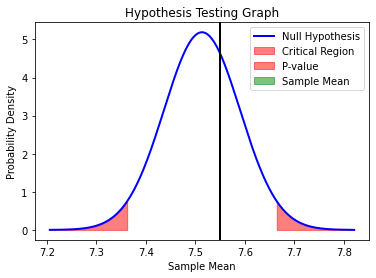

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define variables
actual_mean = 7.5136
sample_mean = 7.5510
hypothesised_mean = 8
n = 47
pop_std = 0.5270
alpha = 0.05

# Calculate the critical value for the test
crit_val = stats.norm.ppf(1 - alpha/2)

# Calculate the standard error
std_error = pop_std / np.sqrt(n)

# Calculate the test statistic
test_statistic = (sample_mean - hypothesised_mean) / std_error

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(abs(test_statistic)))

# Set up the x-axis for the plot
x = np.linspace(actual_mean - 4 * std_error, actual_mean + 4 * std_error, 1000)

# Plot the normal distribution curve
plt.plot(x, stats.norm.pdf(x, actual_mean, std_error), linewidth=2, color='blue')

# Shade the critical region
plt.fill_between(x[x < actual_mean - crit_val * std_error], 0, stats.norm.pdf(x[x < actual_mean - crit_val * std_error], actual_mean, std_error), color='red', alpha=0.5)
plt.fill_between(x[x > actual_mean + crit_val * std_error], 0, stats.norm.pdf(x[x > actual_mean + crit_val * std_error], actual_mean, std_error), color='red', alpha=0.5)

# Shade the area for the p-value
if test_statistic > 0:
    plt.fill_between(x[x > actual_mean + abs(test_statistic) * std_error], 0, stats.norm.pdf(x[x > actual_mean + abs(test_statistic) * std_error], actual_mean, std_error), color='green', alpha=0.5)
else:
    plt.fill_between(x[x < actual_mean - abs(test_statistic) * std_error], 0, stats.norm.pdf(x[x < actual_mean - abs(test_statistic) * std_error], actual_mean, std_error), color='green', alpha=0.5)

# Add labels and a title
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.title('Hypothesis Testing Graph')

# Add a vertical line for the sample mean
plt.axvline(x=sample_mean, color='black', linewidth=2)

# Add a legend
plt.legend(['Null Hypothesis', 'Critical Region', 'P-value', 'Sample Mean'])

# Show the plot
plt.show()


- __White area shows acceptance region and Red area shows rejection region__

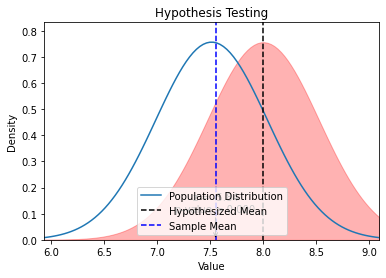

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# population parameters
mu = 7.5136
sigma = 0.5270

# sample parameters
xbar = 7.5510
n = 47

# hypothesized population parameter
mu0 = 8

# significance level
alpha = 0.05

# critical value for two-tailed test
cv = stats.norm.ppf(1-alpha/2)

# compute test statistic and p-value
z = (xbar - mu0) / (sigma / np.sqrt(n))
pval = stats.norm.sf(abs(z))*2

# create figure and axis objects
fig, ax = plt.subplots()

# create a normal distribution
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# plot the normal distribution
ax.plot(x, y, label='Population Distribution')

# create a vertical line at hypothesized mean
ax.axvline(mu0, color='k', linestyle='--', label='Hypothesized Mean')

# create a shaded region for rejection region
if z > cv or z < -cv:
    ax.fill_between(x[x > cv], 0, stats.norm.pdf(x[x > cv], mu0, sigma), alpha=0.3, color='r')
    ax.fill_between(x[x < -cv], 0, stats.norm.pdf(x[x < -cv], mu0, sigma), alpha=0.3, color='r')

# create a vertical line at sample mean
ax.axvline(xbar, color='b', linestyle='--', label='Sample Mean')

# set x and y limits
ax.set_xlim(mu - 3*sigma, mu + 3*sigma)
ax.set_ylim(0, stats.norm.pdf(mu, mu, sigma)*1.1)

# set axis labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Hypothesis Testing')

# add legend
ax.legend()

# annotate the graph with test statistics and p-value
ax.annotate(f"z = {z:.2f}\np-value = {pval:.3f}", xy=(xbar, 0), xytext=(xbar, 0.1), ha='center', va='bottom', arrowprops=dict(arrowstyle='->'))

# show the graph
plt.show()


- __Area under Blue line is for original mean value of 7.5510__
- __Area shaded red is the area under hypothesized mean(8) curve__